In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.svm import SVR, SVC
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

In [10]:
file_path = "filtered_data.csv"
filtered_data = pd.read_csv(file_path)
log_foldChange = filtered_data["log2_foldchange"]

embeddings = np.load('../all_embeddings.npy')

## With Training Data

In [11]:
train_data = pd.read_csv('../train_data.csv')
features = train_data.iloc[:, 2:]
log_foldChange = train_data["log2_foldchange"]

In [12]:
X = features
y = log_foldChange
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Method 1: Linear Regression

Mean Squared Error: 0.7233376617468014
R2 Score: 0.09615887674079804
MAE Score: 0.6171626963191313


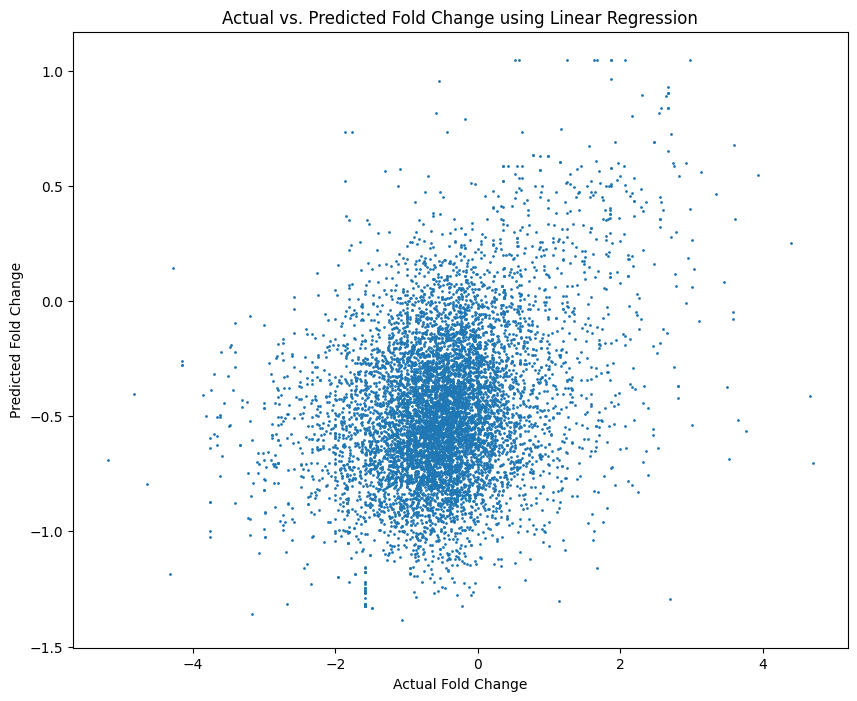

In [13]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

mse = mean_squared_error(y_test, lr_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, lr_pred)
print(f'R2 Score: {r2}')

mae = mean_absolute_error(y_test, lr_pred)
print(f'MAE Score: {mae}')

plt.figure(figsize=(10, 8))
plt.scatter(y_test, lr_pred, s=1)
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.title('Actual vs. Predicted Fold Change using Linear Regression')
plt.show()

## Method 2: Random Forest

Mean Squared Error: 0.5977803337711294
R2 Score: 0.2530480895558769
MAE Score: 0.5035119769959143


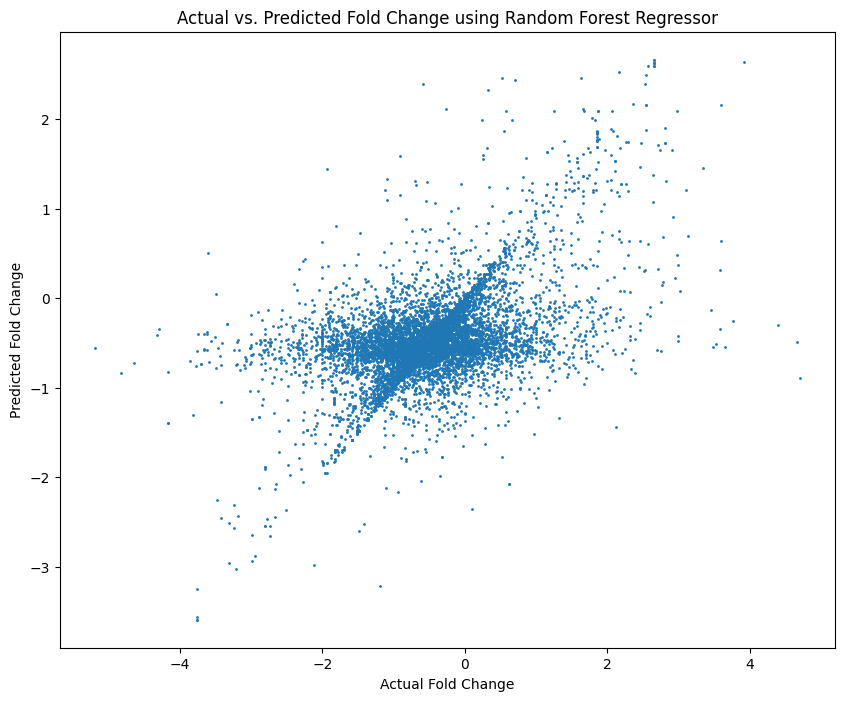

In [14]:
rfe_model = RandomForestRegressor()
rfe_model.fit(X_train, y_train)
rfe_pred = rfe_model.predict(X_test)

mse = mean_squared_error(y_test, rfe_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, rfe_pred)
print(f'R2 Score: {r2}')

mae = mean_absolute_error(y_test, rfe_pred)
print(f'MAE Score: {mae}')

plt.figure(figsize=(10, 8))
plt.scatter(y_test, rfe_pred, s=1)
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.title('Actual vs. Predicted Fold Change using Random Forest Regressor')
plt.show()

## Method 3: SVR

Mean Squared Error: 0.7356190508795096
MAE Score: 0.6059739703781525
R2 Score: 0.080812759517918


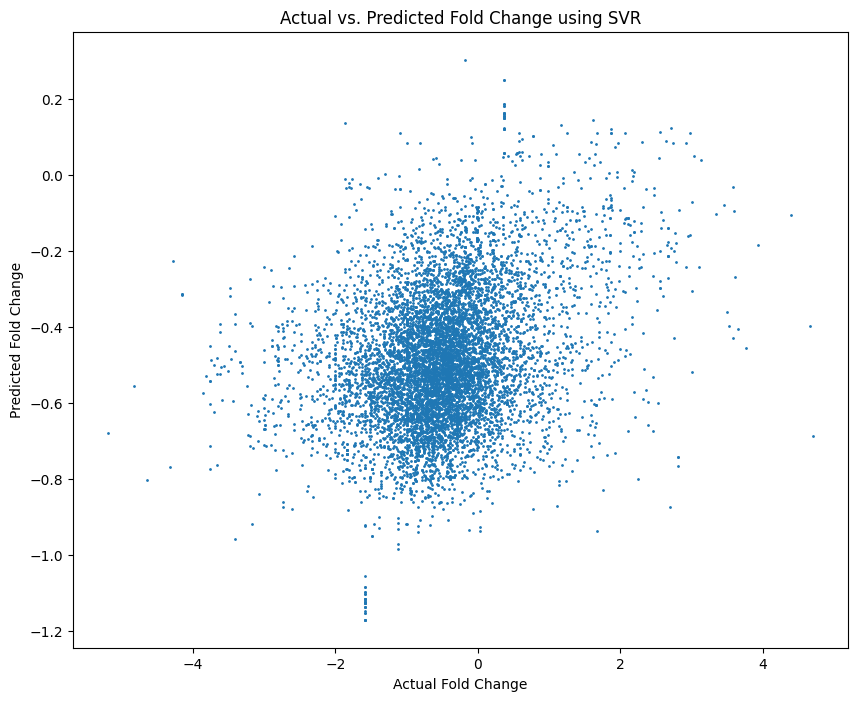

In [15]:
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

mse = mean_squared_error(y_test, svr_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, svr_pred)
print(f'MAE Score: {mae}')

r2_score = r2_score(y_test, svr_pred)
print(f'R2 Score: {r2_score}')

plt.figure(figsize=(10, 8))
plt.scatter(y_test, svr_pred, s=1)
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.title('Actual vs. Predicted Fold Change using SVR')
plt.show()

## Method 4: Gradient Boosting

Mean Squared Error: 0.6819034396566488
MAE Score: 0.5929017533398719


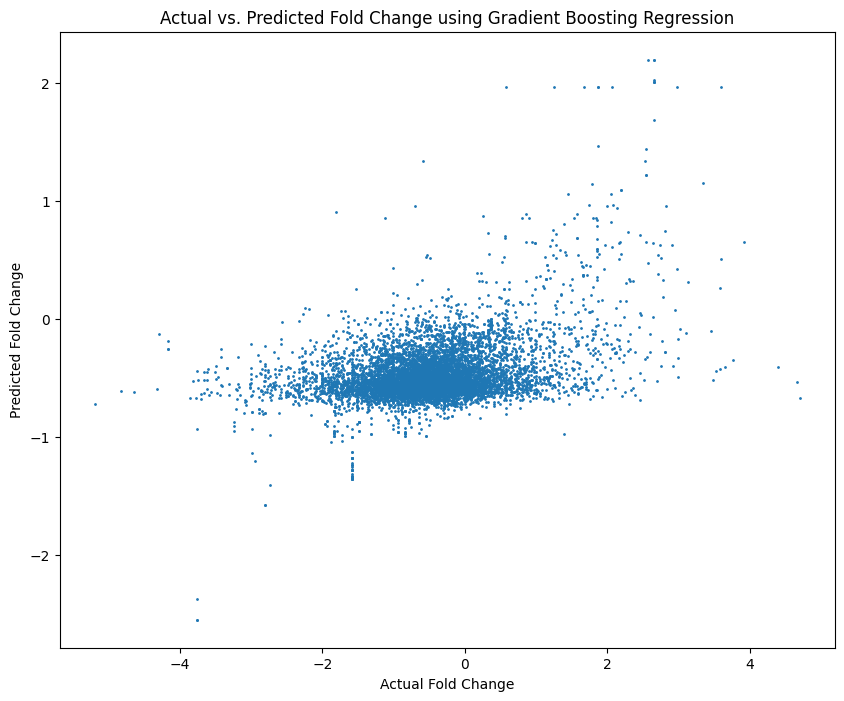

In [18]:
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

mse = mean_squared_error(y_test, gb_pred)
print(f'Mean Squared Error: {mse}')

mae = mean_absolute_error(y_test, gb_pred)
print(f'MAE Score: {mae}')

# r2_score = r2_score(y_test, gb_pred)
# print(f'R2 Score: {r2_score}')

plt.figure(figsize=(10, 8))
plt.scatter(y_test, gb_pred, s=1)
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.title('Actual vs. Predicted Fold Change using Gradient Boosting Regression')
plt.show()

## Determining TPR, Precision, Recall, Specifity, and Sensitivity given best Regression Method

True Positive Rate: 0.667910447761194
Precision: 0.4172494172494173
Recall: 0.4004474272930649
Specificity: 0.9359631147540983
Sensitivity: 0.4004474272930649


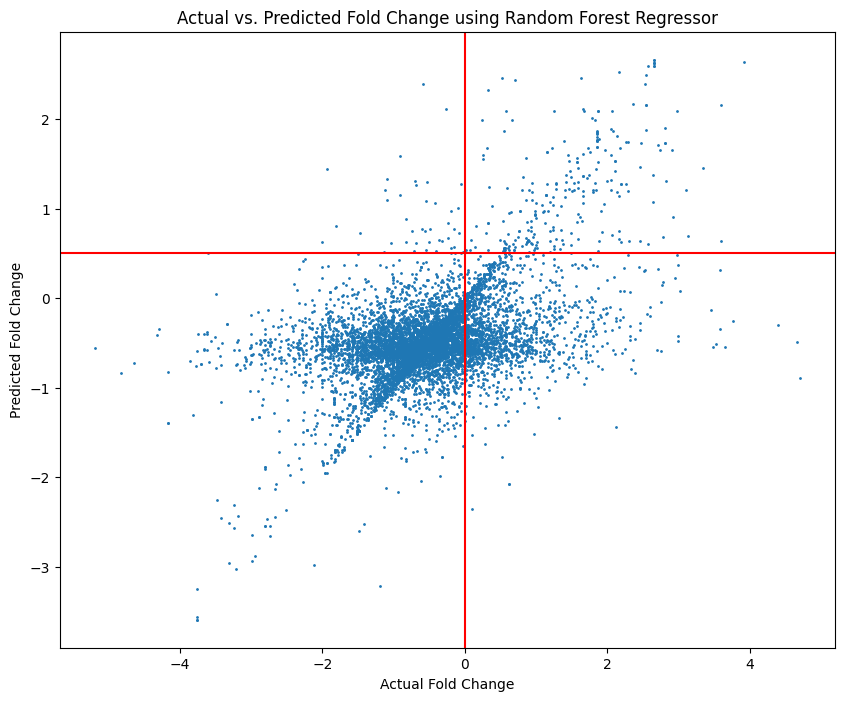

In [17]:
# Cutoff values
cutoff_y = 0.5
cutoff_x = 0

y_test_np = np.array(y_test)

# Calculate the number of points in each quadrant
TP = np.sum((y_test_np >= cutoff_y) & (rfe_pred >= cutoff_x))
FP = np.sum((y_test_np < cutoff_y) & (rfe_pred >= cutoff_x))
TN = np.sum((y_test_np < cutoff_y) & (rfe_pred < cutoff_x))
FN = np.sum((y_test_np >= cutoff_y) & (rfe_pred < cutoff_x))

TPR = TP/FN
prec = TP/(TP+FP)
recall = TP/(TP+FN)
spec = TN/(TN+FP)
sens = TP/(TP+FN)

# Print the calculated values
print(f"True Positive Rate: {TPR}")
print(f"Precision: {prec}")
print(f"Recall: {recall}")
print(f"Specificity: {spec}")
print(f"Sensitivity: {sens}")

plt.figure(figsize=(10, 8))
plt.scatter(y_test, rfe_pred, s=1)
plt.xlabel('Actual Fold Change')
plt.ylabel('Predicted Fold Change')
plt.axhline(y=cutoff_y, color='r', linestyle='-')
plt.axvline(x=cutoff_x, color='r', linestyle='-')
plt.title('Actual vs. Predicted Fold Change using Random Forest Regressor')
plt.show()